In [63]:
import numpy as np
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from shapely.ops import cascaded_union
from geovoronoi.plotting import subplot_for_map, plot_voronoi_polys_with_points_in_area
from geovoronoi import voronoi_regions_from_coords, points_to_coords

In [143]:
# fname_gm = "jednostki_administracyjne/jednostki_administracyjne.shp"
fname_gm = "shp/jednostki_administracyjne/Gminy.shp"

gminy = geopandas.read_file(fname_gm)

gminy.head()

JPT_SJR_KO JPT_KOD_JE    JPT_NAZWA_ JPT_ORGAN_  JPT_JOR_ID   WERSJA_OD  \
0        GMI    1012122      Radomsko       None       13226  2012-09-26   
1        GMI    1425042   JastrzÄbia       None       13252  2012-09-26   
2        GMI    1609083        Ozimek       None       13286  2012-09-26   
3        GMI    1203022        Babice       None       13315  2012-09-26   
4        GMI    1204042  MÄdrzechÃ³w       None       13316  2012-09-26   

  WERSJA_DO    WAZNY_OD WAZNY_DO JPT_KOD__1  ... JPT_KJ_I_1 JPT_KJ_I_2  \
0      None  2012-09-26     None       None  ...    1012122       None   
1      None  2012-09-26     None       None  ...    1425042       None   
2      None  2012-09-26     None       None  ...    1609083       None   
3      None  2012-09-26     None       None  ...    1203022       None   
4      None  2012-09-26     None       None  ...    1204042       None   

  JPT_OPIS  JPT_SPS_KO  ID_BUFOR_1  JPT_ID JPT_KJ_I_3 Shape_Leng Shape_Area  \
0     None         UZG           0  828743       None   0.981927   0.010979   
1     None         UZG           0  825911       None   0.740127   0.011620   
2     None         UZG           0  826181       None   0.978140   0.015986   
3     None         UZG           0  826428       None   0.750713   0.006812   
4     None         UZG           0  826437       None   0.423283   0.005599   

                                            geometry  
0  MULTIPOLYGON (((19.50302 51.07232, 19.50246 51...  
1  POLYGON ((21.27476 51.43793, 21.27468 51.43795...  
2  POLYGON ((18.18160 50.62716, 18.18153 50.62721...  
3  POLYGON ((19.43443 50.02313, 19.43409 50.02316...  
4  POLYGON ((20.92531 50.24308, 20.92531 50.24308...  

[5 rows x 30 columns]

In [144]:
gminy["middle"] = gminy.geometry.centroid
gminy.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


JPT_SJR_KO JPT_KOD_JE    JPT_NAZWA_ JPT_ORGAN_  JPT_JOR_ID   WERSJA_OD  \
0        GMI    1012122      Radomsko       None       13226  2012-09-26   
1        GMI    1425042   JastrzÄbia       None       13252  2012-09-26   
2        GMI    1609083        Ozimek       None       13286  2012-09-26   
3        GMI    1203022        Babice       None       13315  2012-09-26   
4        GMI    1204042  MÄdrzechÃ³w       None       13316  2012-09-26   

  WERSJA_DO    WAZNY_OD WAZNY_DO JPT_KOD__1  ... JPT_KJ_I_2 JPT_OPIS  \
0      None  2012-09-26     None       None  ...       None     None   
1      None  2012-09-26     None       None  ...       None     None   
2      None  2012-09-26     None       None  ...       None     None   
3      None  2012-09-26     None       None  ...       None     None   
4      None  2012-09-26     None       None  ...       None     None   

  JPT_SPS_KO  ID_BUFOR_1  JPT_ID  JPT_KJ_I_3 Shape_Leng Shape_Area  \
0        UZG           0  828743        None   0.981927   0.010979   
1        UZG           0  825911        None   0.740127   0.011620   
2        UZG           0  826181        None   0.978140   0.015986   
3        UZG           0  826428        None   0.750713   0.006812   
4        UZG           0  826437        None   0.423283   0.005599   

                                            geometry  \
0  MULTIPOLYGON (((19.50302 51.07232, 19.50246 51...   
1  POLYGON ((21.27476 51.43793, 21.27468 51.43795...   
2  POLYGON ((18.18160 50.62716, 18.18153 50.62721...   
3  POLYGON ((19.43443 50.02313, 19.43409 50.02316...   
4  POLYGON ((20.92531 50.24308, 20.92531 50.24308...   

                      middle  
0  POINT (19.44806 51.04389)  
1  POINT (21.24254 51.51285)  
2  POINT (18.22119 50.69192)  
3  POINT (19.42364 50.06042)  
4  POINT (20.96771 50.27897)  

[5 rows x 31 columns]

In [145]:
polygon = gminy.geometry.unary_union
#polygon.plot()
#plt.show()
#plt.close()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


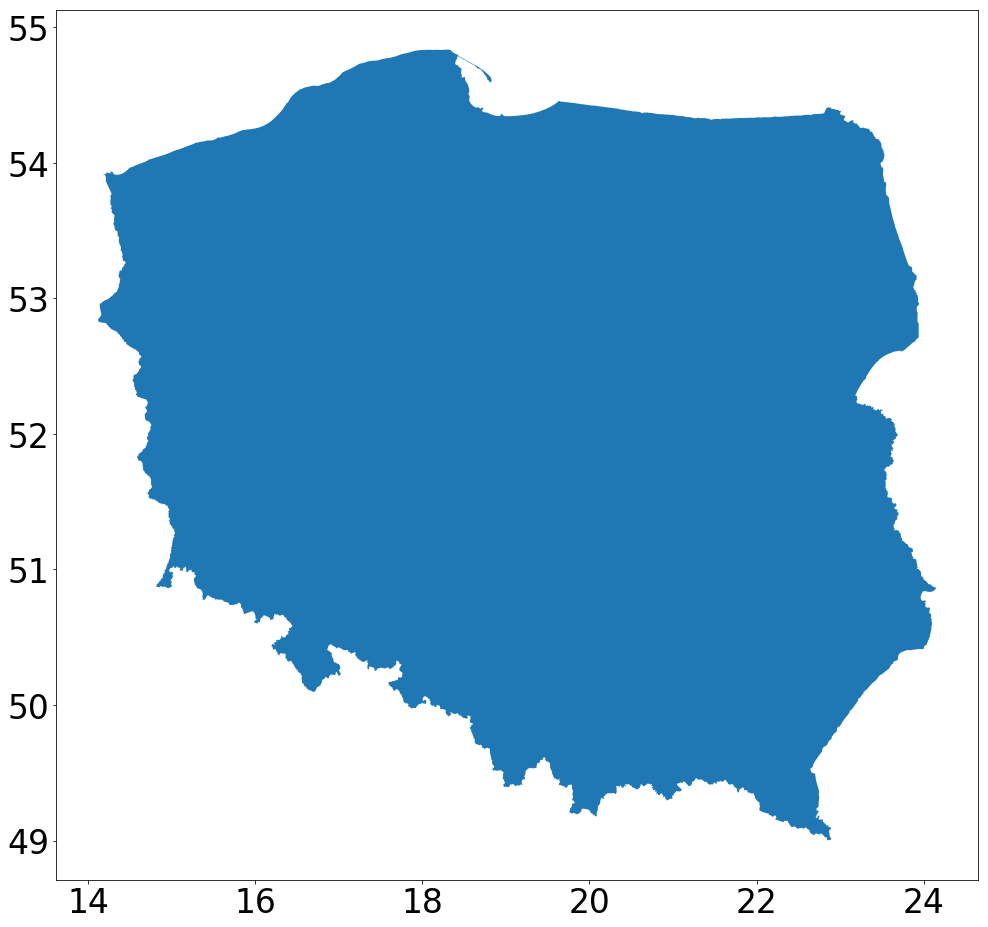

In [146]:
gdf2 = gpd.GeoDataFrame(geometry=[polygon.buffer(0)], crs=gminy.crs)
gdf2.plot()
plt.show()

In [147]:
# boundary = gpd.read_file("Panstwo/polska.shp")

boundary = gdf2

boundary

geometry
0  POLYGON ((14.93458 51.00575, 14.93489 51.00615...

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


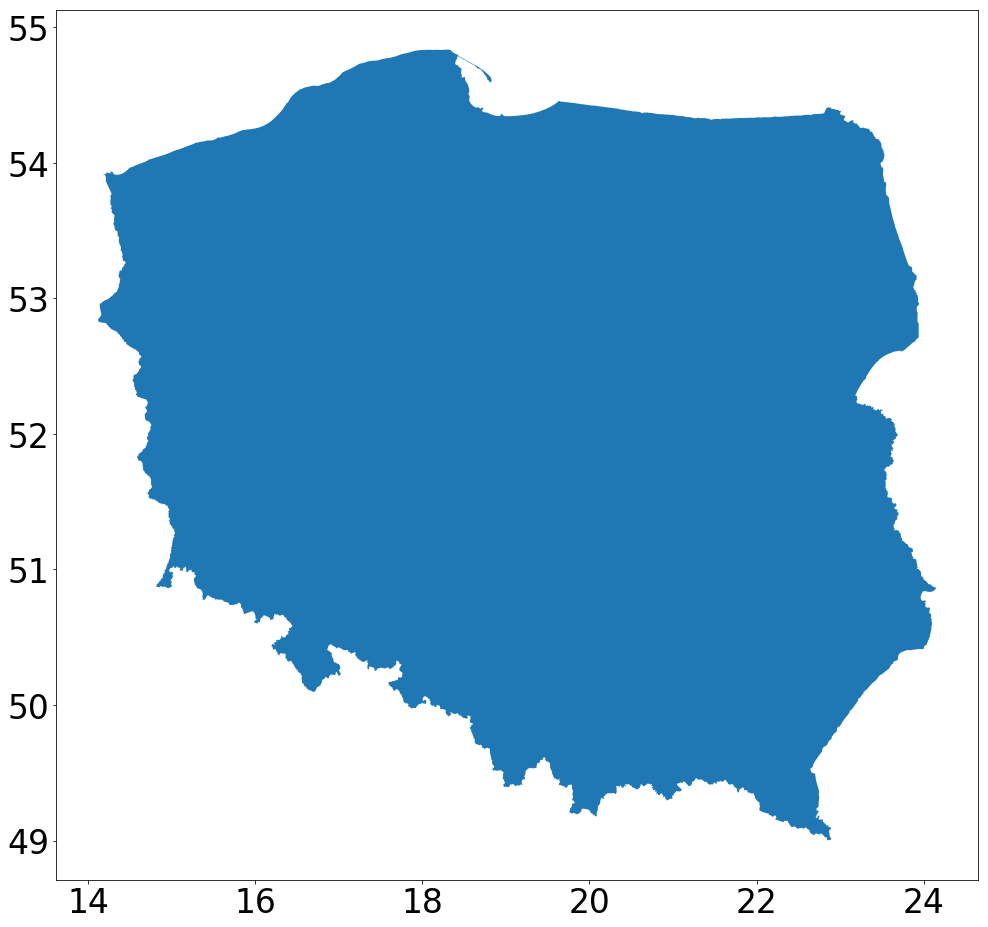

In [148]:
boundary.plot()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


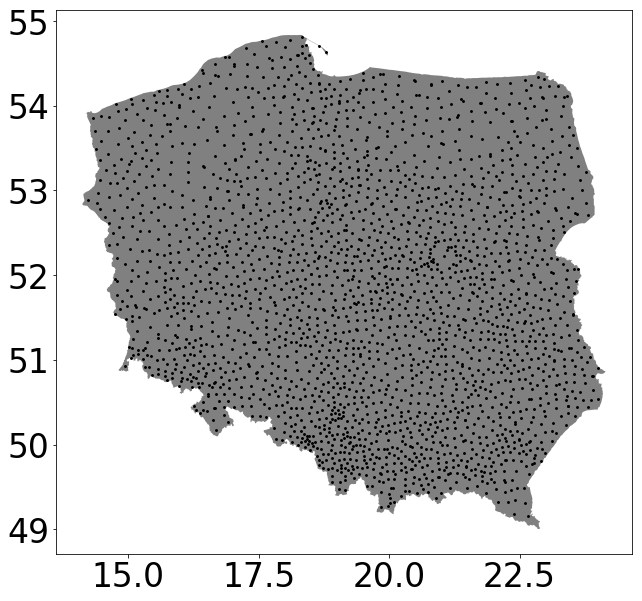

In [149]:
fig, ax = plt.subplots(figsize=(12, 10))
boundary.plot(ax=ax, color="gray")
gminy.middle.plot(ax=ax, markersize=3.5, color="black")
#ax.axis("off")
#plt.axis("equal")
plt.show()

In [150]:
boundary = boundary.to_crs(epsg=3395)
gdf_proj = gminy.to_crs(boundary.crs)

In [151]:
gdf_proj["middle"] = gdf_proj.geometry.centroid

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


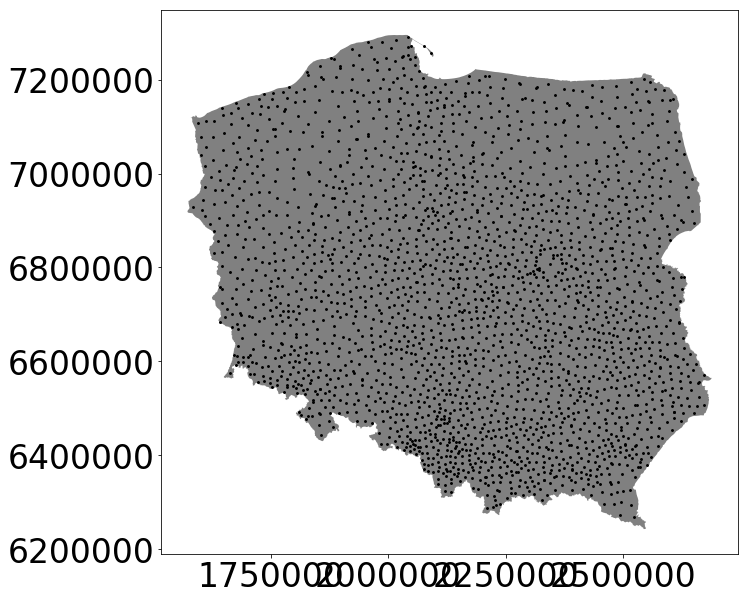

In [152]:
fig, ax = plt.subplots(figsize=(12, 10))
boundary.plot(ax=ax, color="gray")
gdf_proj.middle.plot(ax=ax, markersize=3.5, color="black")
#ax.axis("off")
#plt.axis("equal")
plt.show()

In [155]:
boundary_shape = cascaded_union(boundary.geometry.buffer(0))
coords = points_to_coords(gdf_proj.middle)

In [156]:
# boundary.geometry.buffer(0).plot()
boundary_shape

#plt.show()

In [158]:
# Calculate Voronoi Regions
poly_shapes, pts, poly_to_pt_assignments = voronoi_regions_from_coords(coords, boundary_shape)

## mogę połączyć nazwy 
bądź `TERYT` z tymi nowymi regionami

__to do__

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


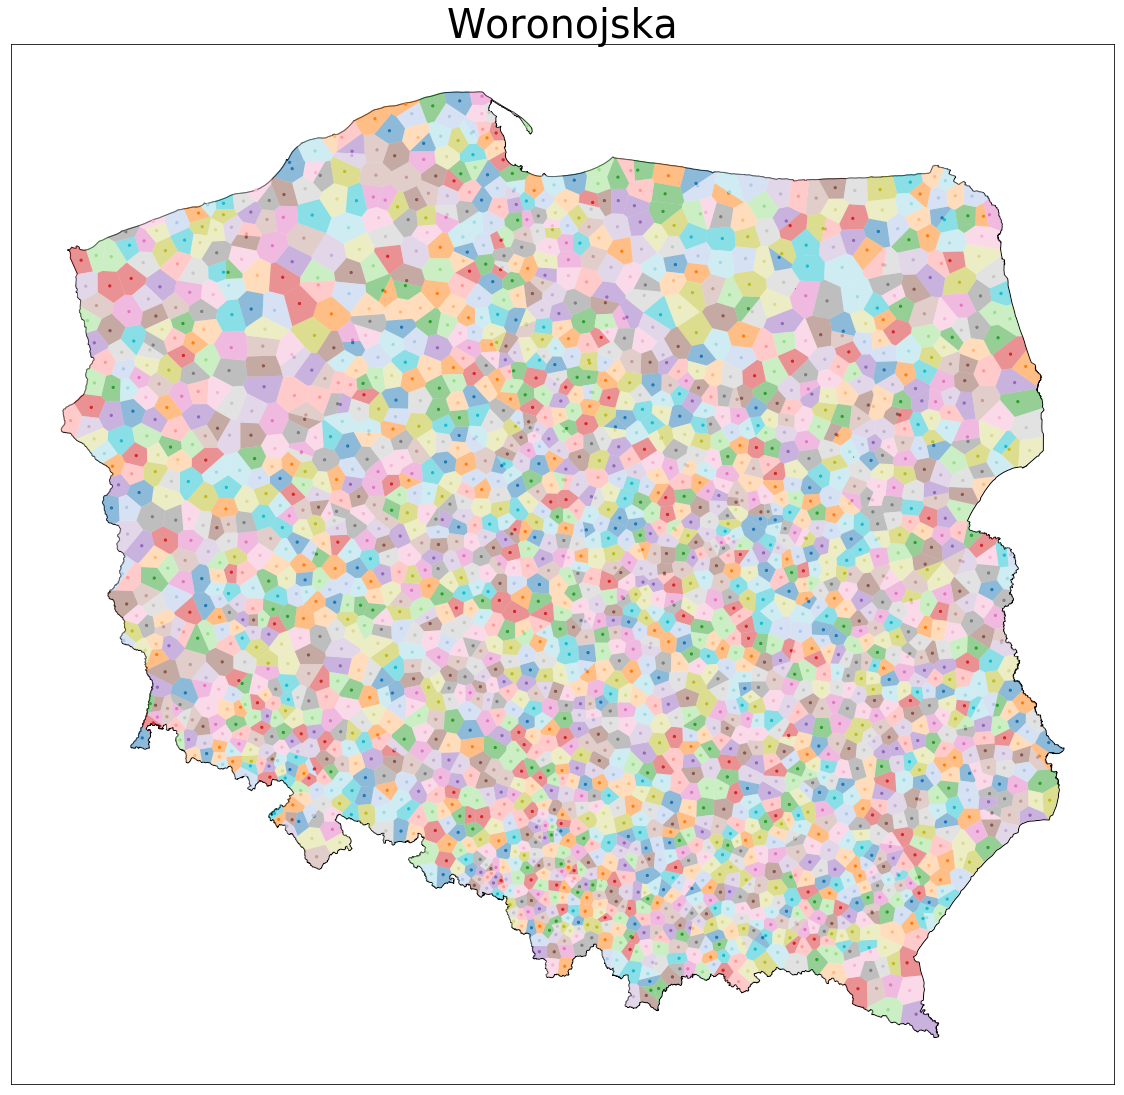

In [159]:
fig, ax = subplot_for_map()
plot_voronoi_polys_with_points_in_area(ax, boundary_shape, poly_shapes, pts, poly_to_pt_assignments)
ax.set_title('Woronojska')
plt.tight_layout()
plt.show()


In [160]:
import matplotlib
plt.rcParams['figure.figsize'] = [18, 16]
font = {'family' : 'normal' ,#'Comic Sans MS',
        'weight' : 'normal',
        'size'   : 33}

matplotlib.rc('font', **font)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


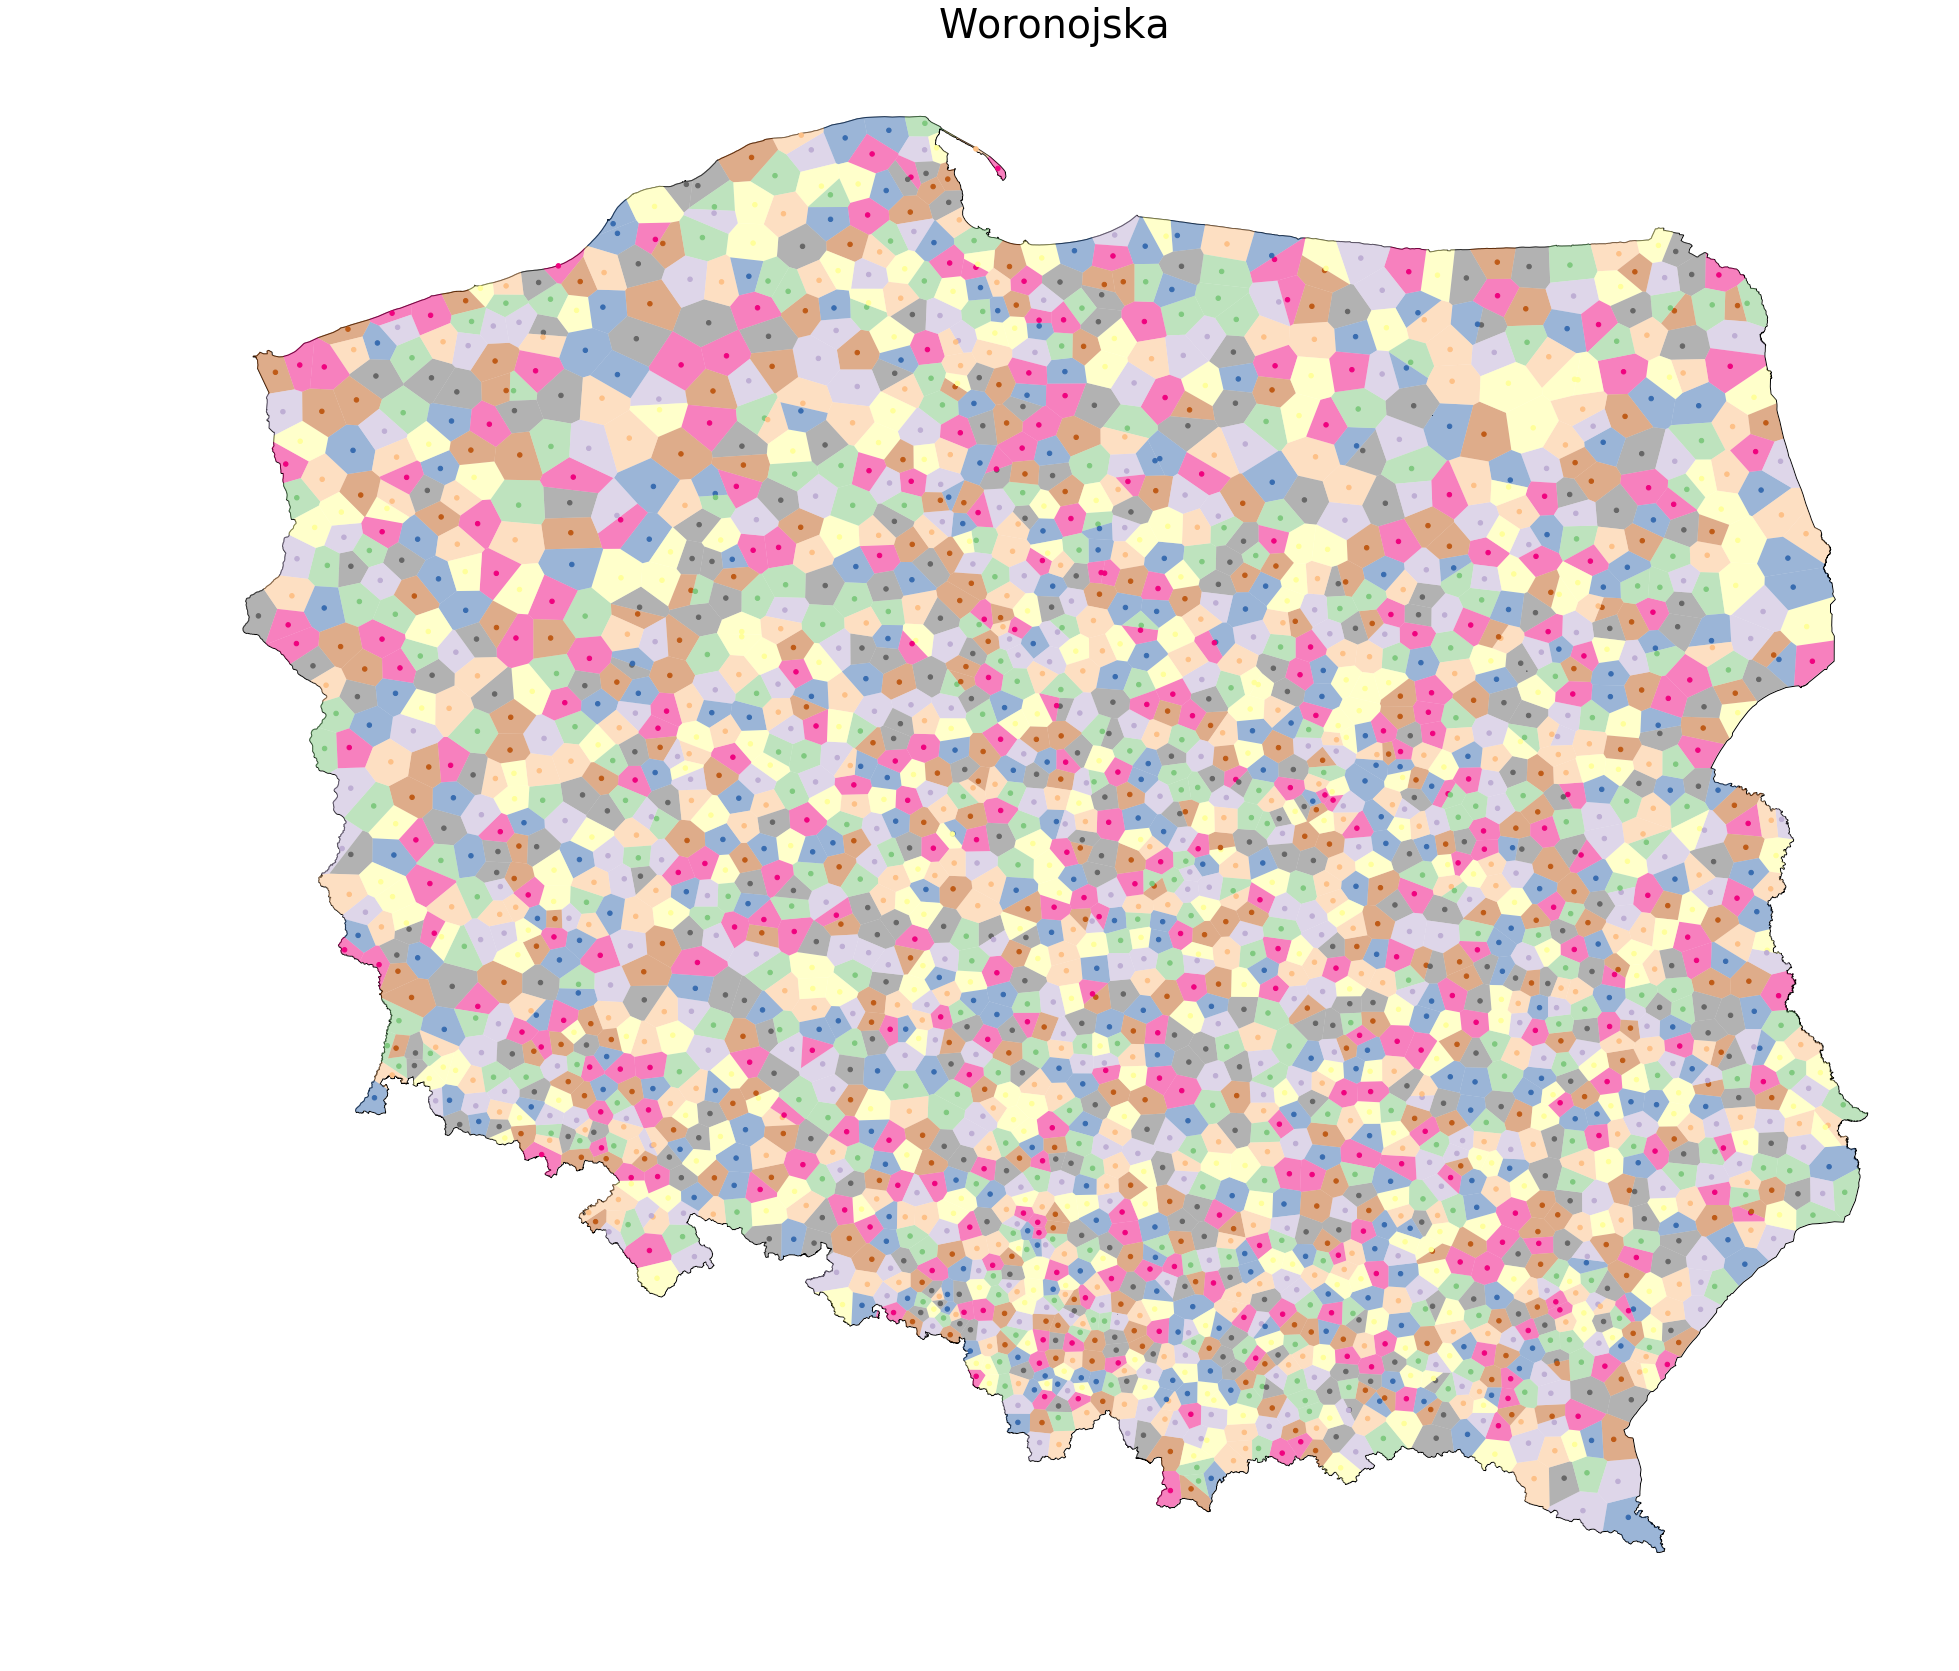

In [161]:
fig, ax = plt.subplots(figsize=(28,24))
plot_voronoi_polys_with_points_in_area(ax, boundary_shape, poly_shapes, pts, poly_to_pt_assignments,
 voronoi_and_points_cmap='Accent',
 points_markersize=20)
ax.set_title('Woronojska')
ax.axis("off")
plt.tight_layout()
plt.savefig("woronoj3_ska2.png", dpi=600, format="png")

plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


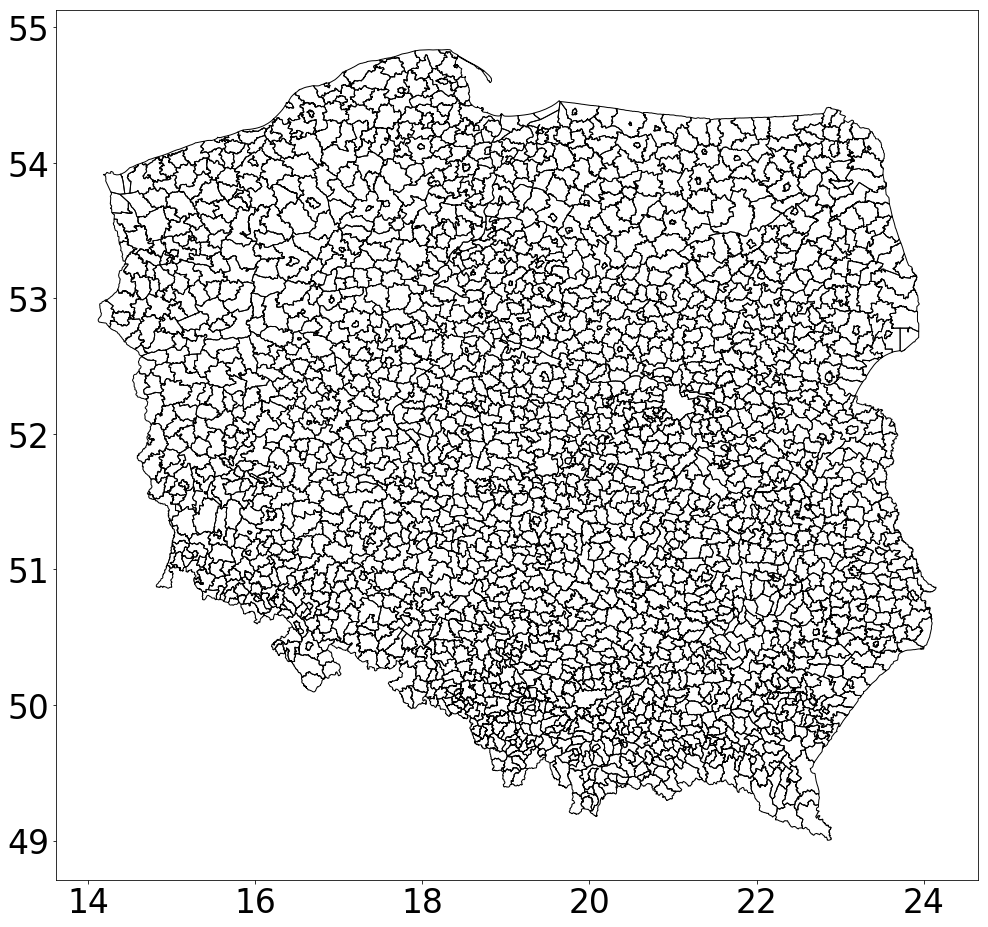

In [162]:
# gminy.boundary.plot(edgecolor="black")
gminy.plot(facecolor="none", edgecolor="black")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


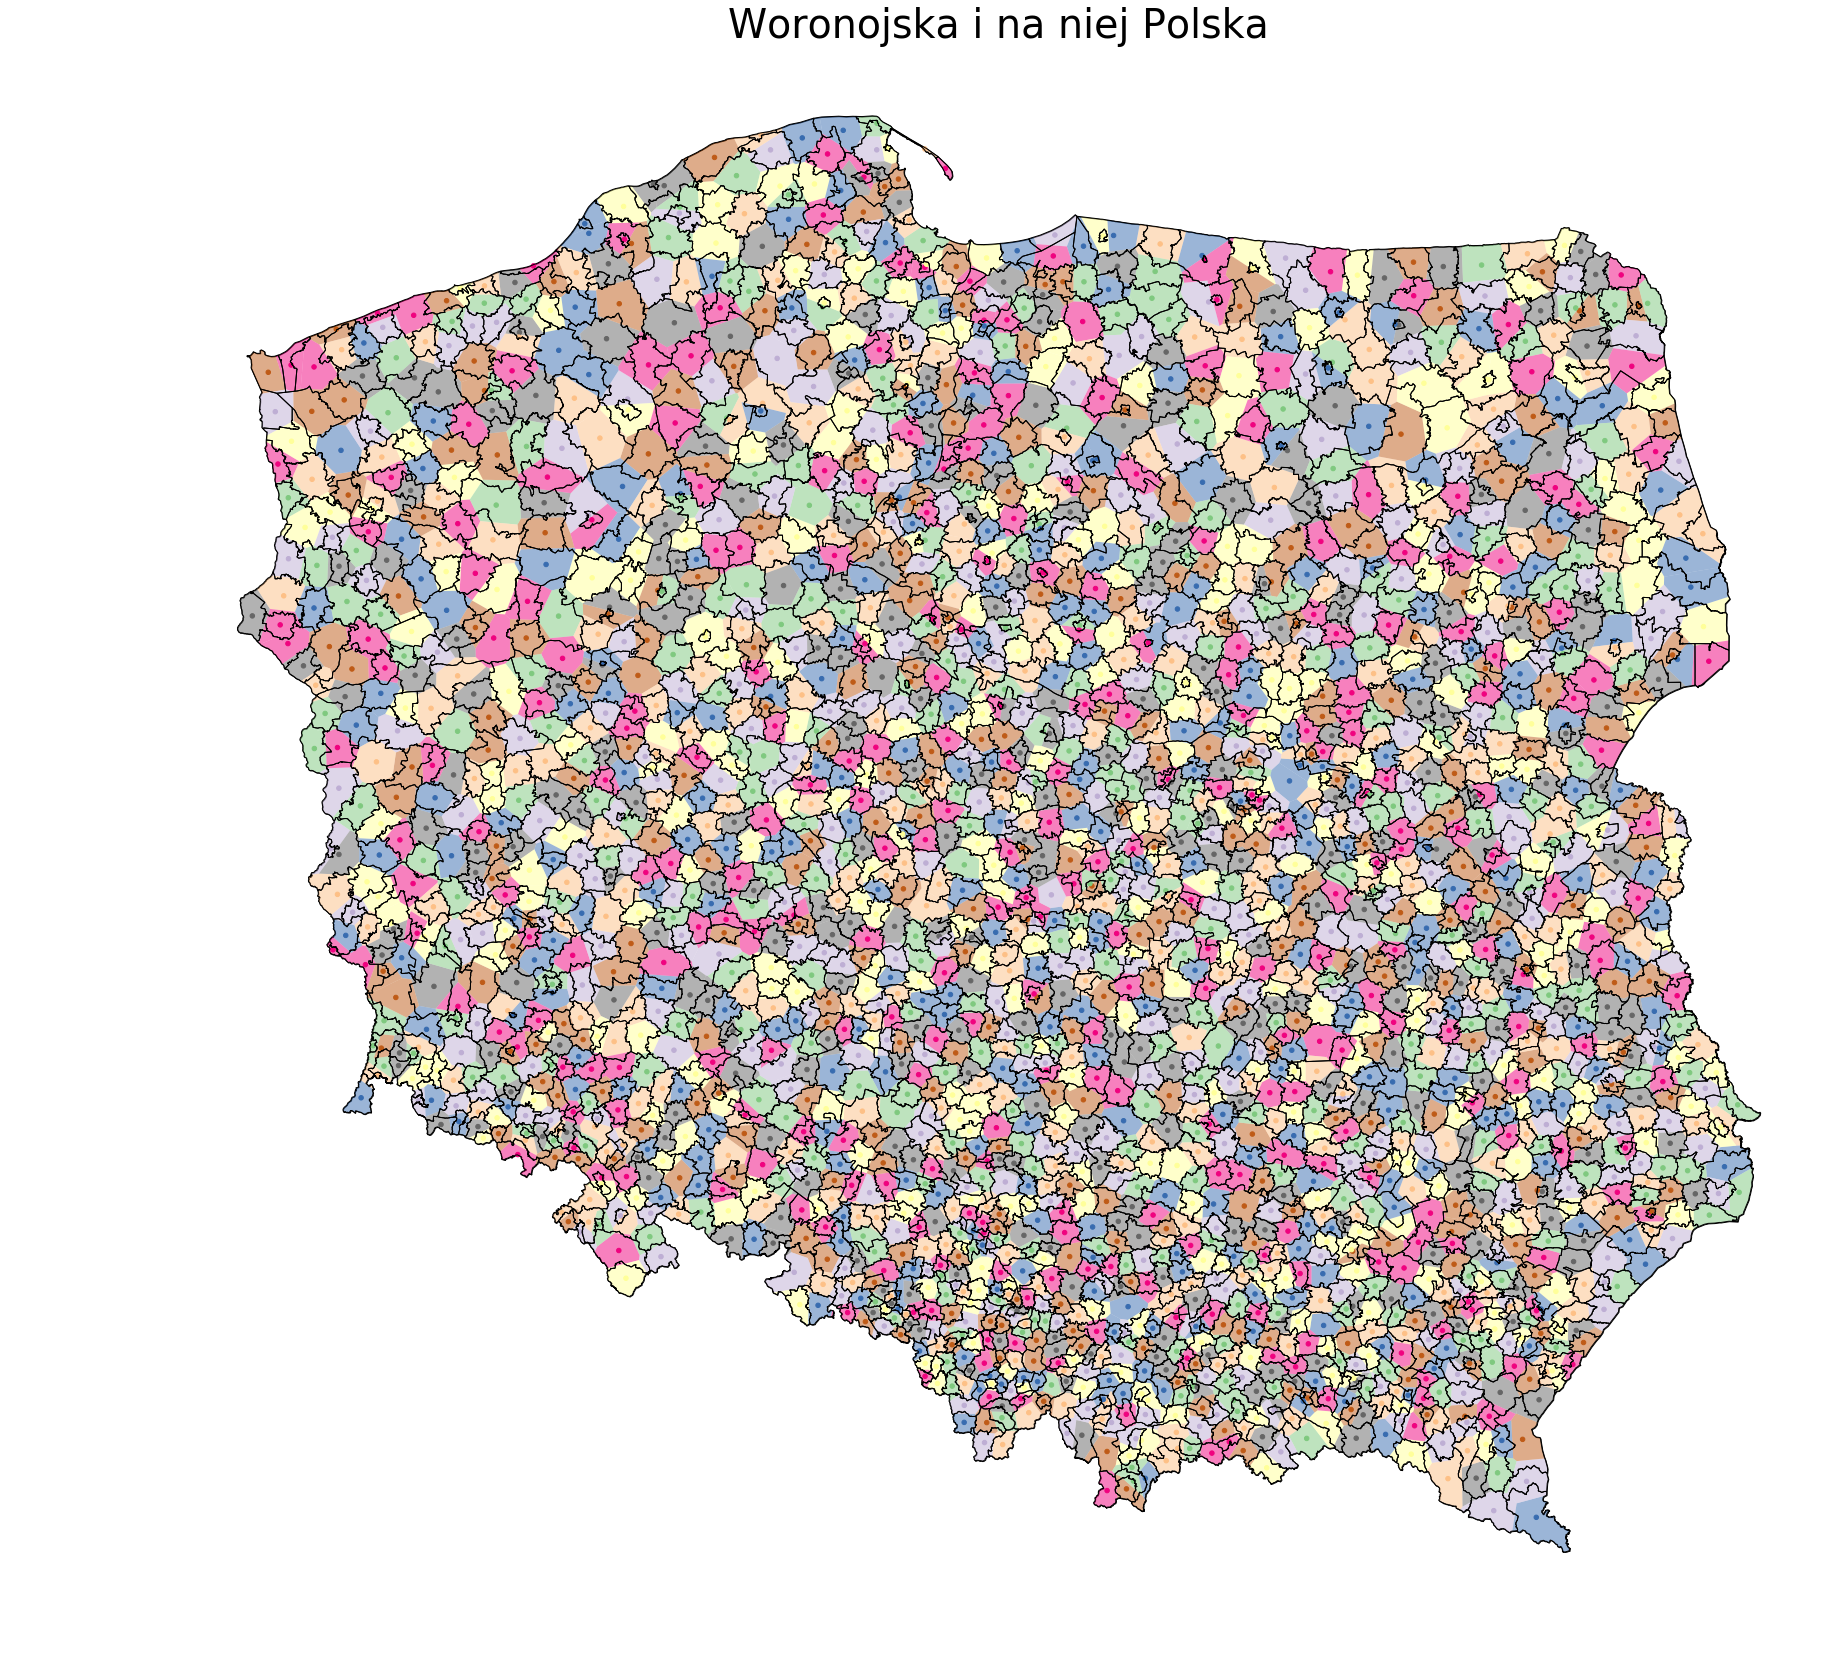

In [163]:
fig, ax = plt.subplots(figsize=(28,24))
plot_voronoi_polys_with_points_in_area(ax, boundary_shape, poly_shapes, pts, poly_to_pt_assignments,
 voronoi_and_points_cmap='Accent',
 points_markersize=20)
gdf_proj.plot(ax=ax, facecolor="none", edgecolor="black")
ax.set_title('Woronojska i na niej Polska')
ax.axis("off")
plt.tight_layout()
plt.savefig("woronoj3_ska3.png", dpi=600, format="png")

plt.show()